In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [48]:
# Load the dataset
data = pd.read_csv('/kaggle/input/titanic-data-analysis-and-classification/submission.csv')

# Define feature matrix (X) and target vector (y)
X = data.drop(columns=['Survived'])  # Replace 'Survived' with the target column in your dataset
y = data['Survived']

# Standardize the feature matrix
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X for RNN input (samples, timesteps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# One-hot encode the target variable if it's categorical
num_classes = len(y.unique())
y = to_categorical(y, num_classes=num_classes)

In [49]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from tensorflow.keras import Input

# Build the RNN model
model = Sequential()

# Add an Input layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add RNN and Dense layers
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multi-class classification


In [51]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5759 - loss: 0.6862 - val_accuracy: 0.6119 - val_loss: 0.6926
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5827 - loss: 0.6815 - val_accuracy: 0.6119 - val_loss: 0.6899
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6017 - loss: 0.6770 - val_accuracy: 0.6119 - val_loss: 0.6904
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5591 - loss: 0.6841 - val_accuracy: 0.6119 - val_loss: 0.6908
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5627 - loss: 0.6863 - val_accuracy: 0.6119 - val_loss: 0.6889
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5948 - loss: 0.6795 - val_accuracy: 0.6119 - val_loss: 0.6892
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6232 - loss: 0.6678 - val_accuracy: 0.6119 - val_loss: 0.6879
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6063 - loss: 0.6709 - val_accuracy: 0.6119 - val_loss: 0.6889
Epoch 9

In [53]:

# Evaluate the model
y_pred_probs = model.predict(X_test)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("F1 Score (Weighted):", f1)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.6309523809523809
Precision (Weighted): 0.6203737191078964
Recall (Weighted): 0.6309523809523809
F1 Score (Weighted): 0.5343314961635572

Confusion Matrix:
 [[50  2]
 [29  3]]


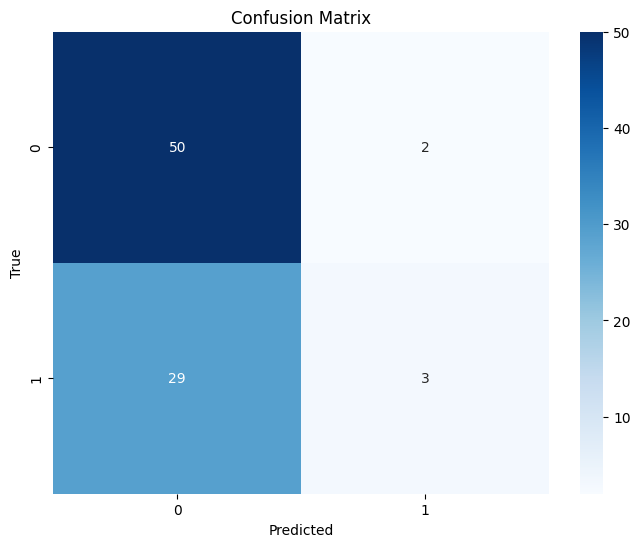

In [55]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **For correlation matrix**

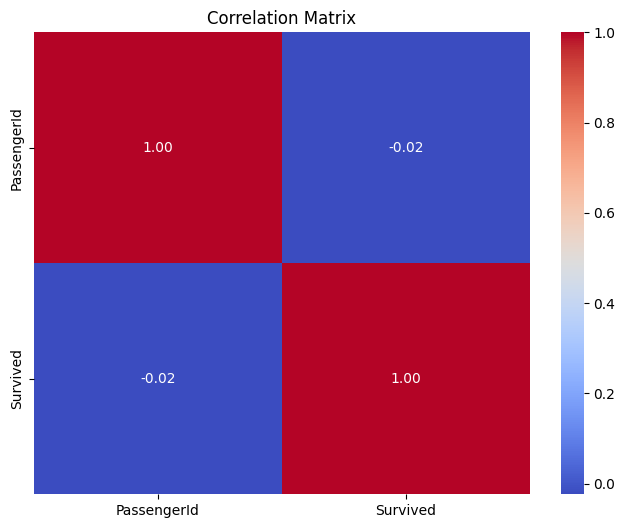

In [56]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
